### Working example of jpgs to tfrecord

[tf tutorials example](https://www.tensorflow.org/tutorials/load_data/tf_records) <br>

[]() <br>
[]() <br>

#### Setup and import files:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import IPython.display as display

# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [2]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

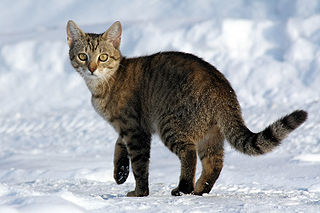

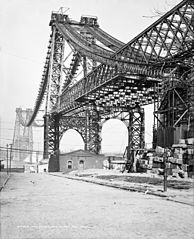

In [3]:
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">source</a>'))

#### Write the tfrecord file

In [4]:
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}
print('cat_in_snow:',type(cat_in_snow),'\n',cat_in_snow)

cat_in_snow: <class 'str'> 
 /Users/mojo/.keras/datasets/320px-Felis_catus-cat_on_snow.jpg


In [5]:
# This is an example, just using the cat image.
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

# Create a dictionary with features that may be relevant.
def image_example(image_string, label):
    image_shape = tf.image.decode_jpeg(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
    print(line)
    
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [6]:
# Write the raw image files to images.tfrecords.
# First, process the two images into tf.Example messages.
# Then, write to a .tfrecords file.

with tf.io.TFRecordWriter('images.tfrecords') as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, 'rb').read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())

#### Read the tfrecord file

In [7]:
import os
os.listdir('.')

['wsi_sampler_II.ipynb',
 'example_code_collection.ipynb',
 'wsi_sampler_IV_OpnSld_obj_flow_4UseCases.ipynb',
 'wsi_sampler_III_boxes_usage.ipynb',
 'wsi_sampler_methodsopsy.ipynb',
 'images.tfrecords',
 'wsi_sampler_Out2_TFRecord.ipynb',
 '.ipynb_checkpoints']

In [7]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.FixedLenFeature([], tf.int64),
    'width': tf.FixedLenFeature([], tf.int64),
    'depth': tf.FixedLenFeature([], tf.int64),
    'label': tf.FixedLenFeature([], tf.int64),
    'image_raw': tf.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    return tf.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<DatasetV1Adapter shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

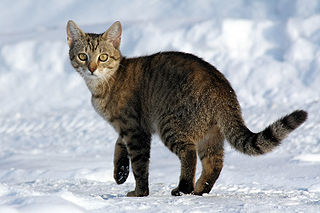

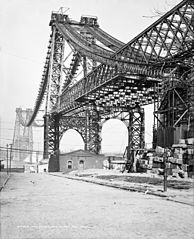

In [8]:
for image_features in parsed_image_dataset:
    image_raw = image_features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))

****
development continues:
***

In [42]:
# import os

out_test_dir = '../../DigiPath_MLTK_data/out_to_test'
jpg_list = []
for f in os.listdir(out_test_dir):
    _, f_ext = os.path.splitext(f)
    if f_ext == '.jpg':
        full_name = os.path.join(out_test_dir, f)
        if full_name in jpg_list:
            print('duplicate name: ???', full_name)
        else:
            jpg_list.append(full_name)
        
# dictionary from files list:
image_labels = {}
for file_number in range(len(jpg_list)):
    image_labels[jpg_list[file_number]] = file_number
    

print('%90s: %i'%('jpg_list', len(jpg_list)))
print('%90s: %i\n'%('image_labels', len(image_labels)))
for f in jpg_list[:20]:
    print('%90s: %i'%(f, image_labels[f]))

                                                                                  jpg_list: 999
                                                                              image_labels: 999

            ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_10568_10791_col_28329_28552.jpg: 0
            ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_11016_11239_col_30569_30792.jpg: 1
              ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_4744_4967_col_27433_27656.jpg: 2
            ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_10792_11015_col_28105_28328.jpg: 3
              ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_7656_7879_col_29001_29224.jpg: 4
              ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_2728_2951_col_30569_30792.jpg: 5
              ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_8552_8775_col_28329_28552.jpg: 6
              ../../DigiPath_MLTK_data/out_to_test/CMU-1_row_7432_7655_col_29897_30120.jpg: 7
              ../../DigiPath_MLTK_data/out_to_test/CMU-

## Try it out:

In [43]:
with tf.io.TFRecordWriter('slide_images.tfrecords') as writer:
    for filename, label in image_labels.items():
        image_string = open(filename, 'rb').read()
        tf_example = image_example(image_string, label)
        writer.write(tf_example.SerializeToString())
os.listdir()

['wsi_sampler_II.ipynb',
 'slide_images.tfrecords',
 'wsi_sampler_IV_OpnSld_obj_flow_4UseCases.ipynb',
 'wsi_sampler_III_boxes_usage.ipynb',
 'wsi_sampler_methodsopsy.ipynb',
 'images.tfrecords',
 'wsi_sampler_Out2_TFRecord.ipynb',
 '.ipynb_checkpoints',
 'tf_tutorial_write_read_tfrecord.ipynb']

In [47]:
raw_image_dataset = tf.data.TFRecordDataset('slide_images.tfrecords')
# raw_image_dataset = tf.data.get_output_classes('slide_images.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.FixedLenFeature([], tf.int64),
    'width': tf.FixedLenFeature([], tf.int64),
    'depth': tf.FixedLenFeature([], tf.int64),
    'label': tf.FixedLenFeature([], tf.int64),
    'image_raw': tf.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    return tf.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
type(parsed_image_dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

<class 'dict'> tf.Tensor(0, shape=(), dtype=int64) <class 'tensorflow.python.framework.ops.EagerTensor'>


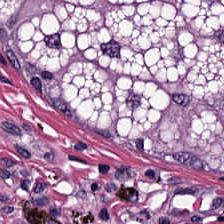

<class 'dict'> tf.Tensor(1, shape=(), dtype=int64) <class 'tensorflow.python.framework.ops.EagerTensor'>


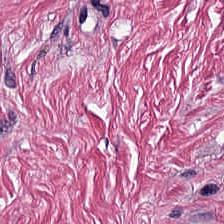

<class 'dict'> tf.Tensor(2, shape=(), dtype=int64) <class 'tensorflow.python.framework.ops.EagerTensor'>


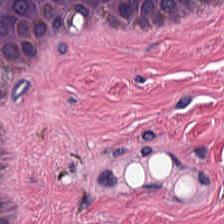

In [55]:
for dakine in parsed_image_dataset.take(3):
    print(type(dakine), dakine['label'], type(dakine['image_raw']))
    image_raw = dakine['image_raw'].numpy()
    display.display(display.Image(data=image_raw))


In [52]:
dakine.keys()

dict_keys(['depth', 'height', 'image_raw', 'label', 'width'])

In [45]:
help(parsed_image_dataset)

Help on DatasetV1Adapter in module tensorflow.python.data.ops.dataset_ops object:

class DatasetV1Adapter(DatasetV1)
 |  DatasetV1Adapter(dataset)
 |  
 |  Wraps a V2 `Dataset` object in the `tf.compat.v1.data.Dataset` API.
 |  
 |  Method resolution order:
 |      DatasetV1Adapter
 |      DatasetV1
 |      DatasetV2
 |      tensorflow.python.training.tracking.base.Trackable
 |      tensorflow.python.framework.composite_tensor.CompositeTensor
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataset)
 |      Creates a DatasetV2 object.
 |      
 |      This is a difference between DatasetV1 and DatasetV2. DatasetV1 does not
 |      take anything in its constructor whereas in the DatasetV2, we expect
 |      subclasses to create a variant_tensor and pass it in to the super() call.
 |      
 |      Args:
 |        variant_tensor: A DT_VARIANT tensor that represents the dataset.
 |  
 |  __iter__(self)
 |      Creates an `Iterator` for enumerating the elements